In [1]:
import sklearn
from sklearn.manifold import TSNE
import os
import glob
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import re

%matplotlib notebook

allFiles = glob.glob(os.path.join("*.txt"))


np_array_list = []
column_names = []
column = []
for file_ in allFiles:
    df = pd.read_csv(file_,index_col=None, header=0, sep="\t")
    if re.search(r"AB242[657]", file_):
        df.loc[len(df) + 1] = [1 + 0*x for x in range(len(df.iloc[1]))]
    if re.search(r"AB24[34][178]", file_):
        df.loc[len(df) + 1] = [2 + 0*x for x in range(len(df.iloc[1]))]
    if re.search(r"AB243[540]", file_):
        df.loc[len(df) + 1] = [3 + 0*x for x in range(len(df.iloc[1]))]
    if re.search(r"AB244[034]", file_):
        df.loc[len(df) + 1] = [4 + 0*x for x in range(len(df.iloc[1]))]
    np_array_list.append(df.as_matrix())
    column_names.append(list(df))
    rows = list(df.index)

for z in column_names:
    for i in z:
        column.append(i)

comb_np_array = np.hstack(np_array_list)
gene_df = pd.DataFrame(comb_np_array)
gene_df = gene_df.T

gene_df.columns = rows 
gene_df.index = column


gene_df["new_column"] = pd.Series(range(len(gene_df)))
gene_count = len(gene_df["new_column"])
del gene_df["new_column"]


In [6]:
gene18 = gene_df[["Cd79b", "Cst7", "S100a9", "Trbc2", "S100a4", "Cd163", "Lpl", "Camp", "P2ry12", "Cst3", "Hexb", "Nkg7", "Rag1", "Cd74",
        "Mrc1", "Ctsd", "Cd9", "Cx3cr1"]]

In [7]:
gene18["new_column"] = pd.Series(range(len(gene18)))
gene_count = len(gene18["new_column"])
del gene18["new_column"]



C:\Users\Polina\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [12]:
gene18[34017] = gene_df[34017]


C:\Users\Polina\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [13]:
X = np.vstack([gene18.iloc[i] for i in range(gene_count)])
Y = np.hstack([gene18[i] for i in gene18.iloc[0].keys()])


In [14]:
digits = TSNE(random_state=0, n_components=2).fit_transform(X)

<IPython.core.display.Javascript object>


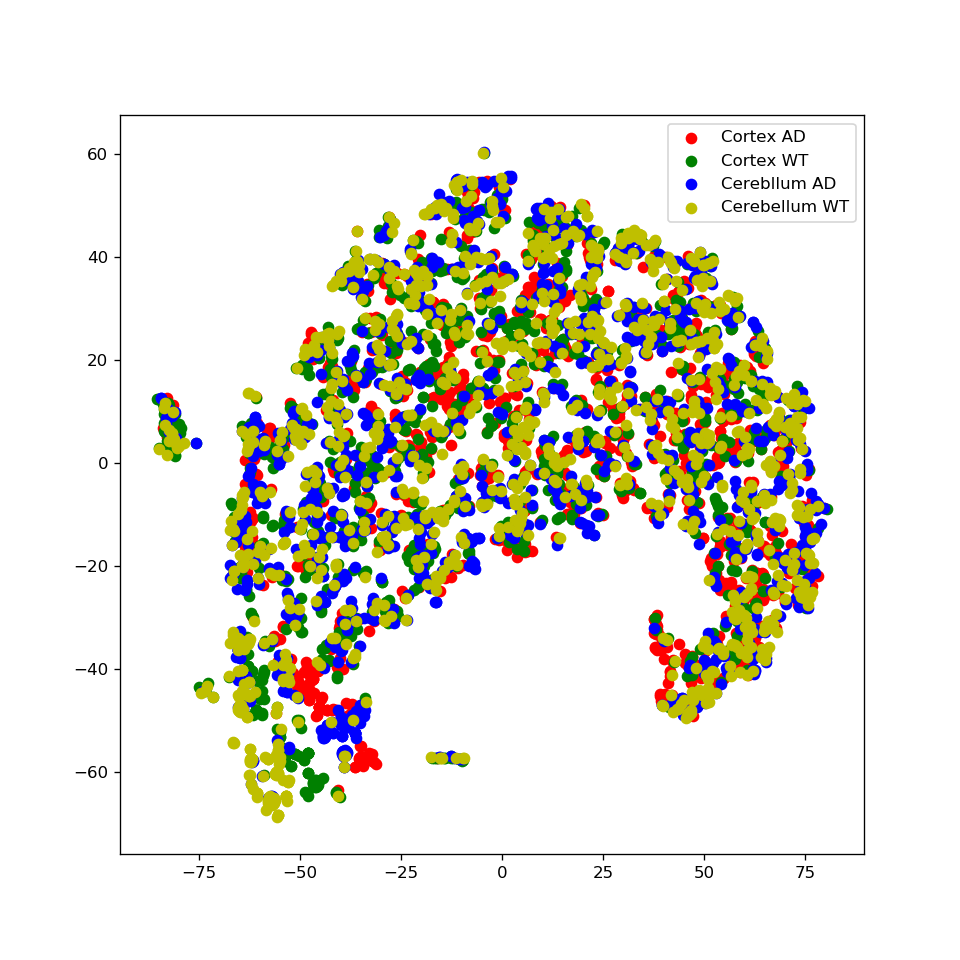

In [15]:
target_ids = range(1, len(gene18[34017]))
y = np.hstack([gene18[34017][gene18[34017] == i] for i in [1, 2, 3, 4]])

from matplotlib import pyplot as plt
plt.figure(figsize=(8, 8))
colors = 'r', 'g', "b", "y" #в зависимости от количества типов нужно задать количество цветов

for i, c, label in zip(target_ids, colors, ["Cortex AD", "Cortex WT", "Cerebllum AD", "Cerebellum WT"]):
    plt.scatter(digits[y == i, 0], digits[y == i, 1], c=c, label=label) 
    #в качестве у должен подаваться вектор из чисел, вектор из строк он не признает
plt.legend()
plt.show()
plt.savefig('digi18.png', dpi=500)

<IPython.core.display.Javascript object>


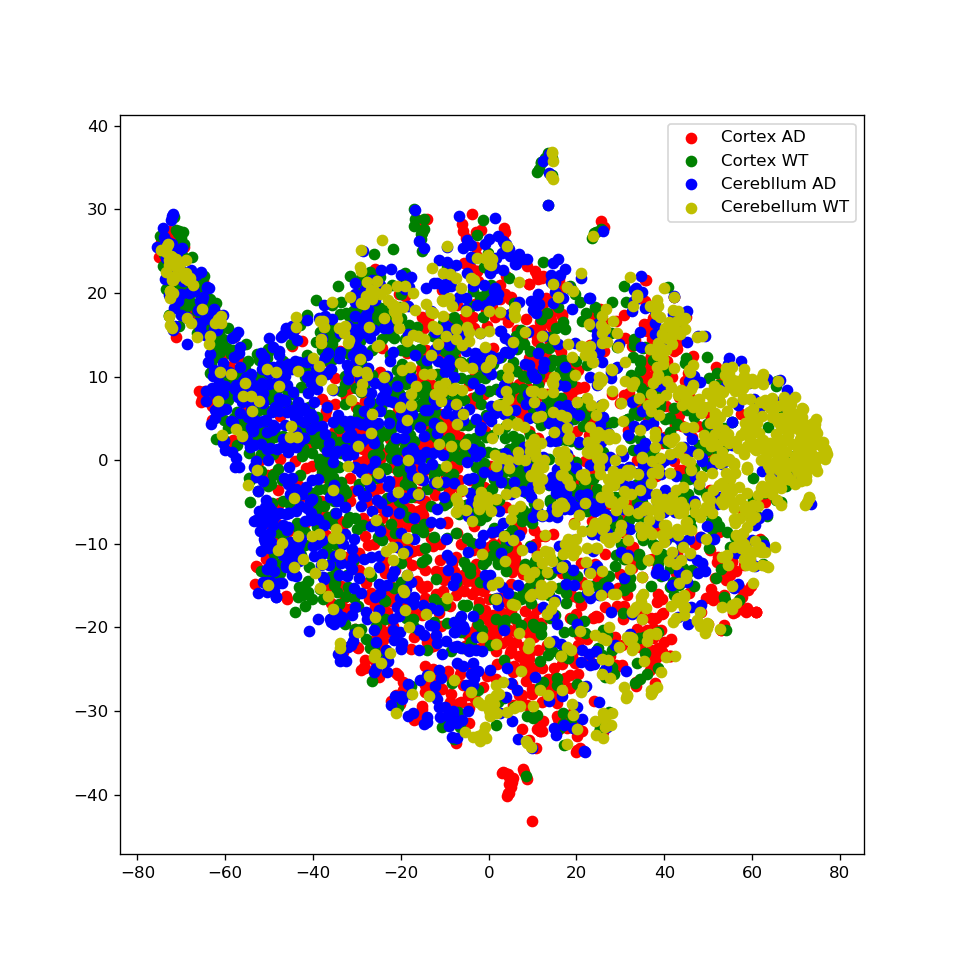

In [5]:
target_ids = range(1, len(gene_df[34017]))
y = np.hstack([gene_df[34017][gene_df[34017] == i] for i in [1, 2, 3, 4]])

from matplotlib import pyplot as plt
plt.figure(figsize=(8, 8))
colors = 'r', 'g', "b", "y" #в зависимости от количества типов нужно задать количество цветов

for i, c, label in zip(target_ids, colors, ["Cortex AD", "Cortex WT", "Cerebllum AD", "Cerebellum WT"]):
    plt.scatter(digits[y == i, 0], digits[y == i, 1], c=c, label=label) 
    #в качестве у должен подаваться вектор из чисел, вектор из строк он не признает
plt.legend()
plt.show()
plt.savefig('digi12.png', dpi=500)